### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 4
### Due: Saturday, Feb 24th at 11.59pm CST
---

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

### Solution

Question 1, Part 1 

In [36]:

import os
import numpy as np
os.chdir('/home/hoelsczj/repos/astr_8070_S24/coursework/homeworks/hw_data')
Data1=np.load('hw4_data_1.npy')
print("Data: ")
print(Data1) #printing out data so I can see it 
print(" ")
Voltages=Data1[:,0] #Pulling first column 
print('Sample mean: ')
print(np.sum(Voltages)/len(Voltages)) #Averaging the values in this column 

StandardError=np.std(Voltages)/np.sqrt(len(Voltages)) #Approx standard error is sample std dev divided by sqrt of number of samples?
print("Standard Error: ")
print(StandardError)

print("Average of Uncertainty Values: ") #Printing the average of the uncertainty values, just because I want to see this 
Uncertainties=Data1[:,1]
print(np.sum(Uncertainties)/len(Uncertainties))


Data: 
[[4.36 2.24]
 [4.   1.94]
 [4.87 1.39]
 [5.64 2.55]
 [6.14 1.69]
 [5.92 1.38]
 [3.93 1.  ]
 [6.58 1.6 ]
 [3.78 1.  ]
 [5.84 1.  ]]
 
Sample mean: 
5.106
Standard Error: 
0.31152913186410025
Average of Uncertainty Values: 
1.579


Question 1, part 2:

From Lecture VIII:
$$L \equiv p(\{x_i\}|\mu,\sigma_i) = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$

In [37]:
import scipy 
def NegativeLnLikelihood(mu_variable):
    LogLikelihood=0
    for row in Data1:
        Volts=row[0] #data point is the first value 
        sigma=row[1] #Uncertainty is the second value 
        LogLikelihood=LogLikelihood+np.log(np.exp((-(Volts-mu_variable)**2)/(2*sigma*sigma))/(sigma*np.sqrt(2*np.pi)))
        #I applied the fact that the Log of a product is the sum of the logs of the terms that are multiplied. 
    return -1*LogLikelihood #Multiply by neg 1 so the minimizer will maximize the log likelihood, rather than minimizing it 
Output=scipy.optimize.minimize(NegativeLnLikelihood, 6) #Find extremum with initial guess of 6.
print(Output)
print("Fitted mean: ")
print(Output.x)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 16.048012714571364
        x: [ 4.942e+00]
      nit: 2
      jac: [ 0.000e+00]
 hess_inv: [[ 1.851e-01]]
     nfev: 6
     njev: 3
Fitted mean: 
[4.94211819]


Question 1, part 3

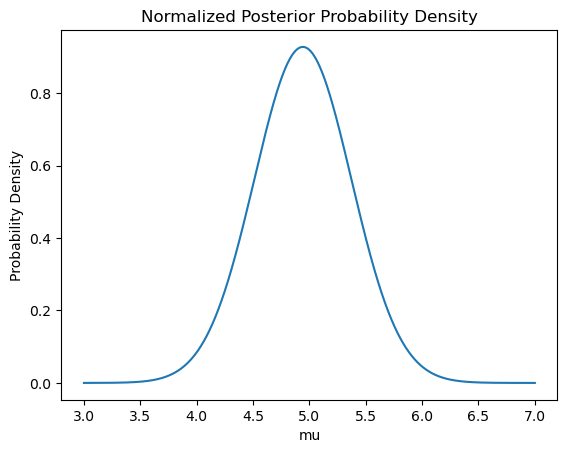

Evidence: 
2.8918714381486332e-08


In [82]:
import math 
from matplotlib import pyplot as plt 
Prior=(1/(7-3))

def LnLikelihood(mu_variable):
    LogLikelihood=0
    for row in Data1:
        Volts=row[0] #data point is the first value 
        sigma=row[1] #Uncertainty is the second value 
        LogLikelihood=LogLikelihood+np.log(np.exp((-(Volts-mu_variable)**2)/(2*sigma*sigma))/(sigma*np.sqrt(2*np.pi)))
        #I applied the fact that the Log of a product is the sum of the logs of the terms that are multiplied. 
    return LogLikelihood #Multiply by neg 1 so the minimizer will maximize the log likelihood, rather than minimizing it 

def UnNormalizedPosterior(mu_variable):
    Normalization=1
    return Normalization*Prior*math.exp(LnLikelihood(mu_variable)) #Take exp of LnLikelihood so we get the likelihood back 

xgrid=np.linspace(3,7,100000) #I used lots of values here so the integral converges nicely
UnNormalizedPosteriorValues=[]
for element in xgrid: #Load unnormalized posterior probability density values into a list 
    UnNormalizedPosteriorValues.append(UnNormalizedPosterior(element))
PosteriorIntegral=np.sum(UnNormalizedPosteriorValues)*(xgrid[1]-xgrid[0]) #Integrate using Riemann Sum 

def NormalizedPosterior(mu_variable):
    Normalization=1/PosteriorIntegral #Normalizing the distribution to integrate to 1 
    return Normalization*Prior*math.exp(LnLikelihood(mu_variable))

NormalizedPoseteriorValues=[] 
for element in xgrid: #Loading values for normalized posterior probability density distribution into a list so I can plot it 
    NormalizedPoseteriorValues.append(NormalizedPosterior(element))

Three_to_Seven=NormalizedPoseteriorValues #Store for later plotting 

#Plotting the normalized distribution 
plt.plot(xgrid, NormalizedPoseteriorValues)
plt.xlabel("mu")
plt.ylabel("Probability Density")
plt.title("Normalized Posterior Probability Density")
plt.show()

print("Evidence: ")
print(PosteriorIntegral)


Question 1, part 4

In [39]:
def NormalizedPosterior(mu_variable):
    LogLikelihood=0
    for row in Data1:
        Volts=row[0] #data point is the first value 
        sigma=row[1] #Uncertainty is the second value 
        LogLikelihood=LogLikelihood+np.log(np.exp((-(Volts-mu_variable)**2)/(2*sigma*sigma))/(sigma*np.sqrt(2*np.pi)))
        #I applied the fact that the Log of a product is the sum of the logs of the terms that are multiplied. 
    return math.exp(LogLikelihood)*Prior*(1/PosteriorIntegral)

def CDF(mu):
    numvals=int(np.ceil((mu-3)/(10**(-5))))
    xgrid=np.linspace(3,mu,numvals)
    NormalizedPosteriorValues=[]
    for element in xgrid:
        NormalizedPosteriorValues.append(NormalizedPosterior(element))
    return np.sum(NormalizedPosteriorValues)*(10**(-5)) #Integrate using Riemann Sum 

DesiredCDFValue=(1-0.683)/2 #Half of 1 - 0.683 so equal tails leave 68.3 probability around the mean 
CDFValue=0 #initializing values 
testedmu=4.5
while testedmu < 7: #brute force search, plugging values into the CDF. This is inefficient, though it runs fast enough for this, and it is easy to code
    CDFValue=CDF(testedmu) #upate cdf 
    if ((CDFValue-DesiredCDFValue)**2)/DesiredCDFValue>0.00001:
        testedmu=testedmu+0.001 #try a bigger value if we aren't getting what we want 
    else:
        fittedmu=testedmu
        testedmu = 8 #To make it stop if we have what we want 
print("For 68.3% within equal tails, we have mu between these two values : ")
print(fittedmu)
print(7-(fittedmu-3))

print("CDF at lower value: ")
print(CDF(fittedmu))

For 68.3% within equal tails, we have mu between these two values : 
4.510000000000003
5.489999999999997
CDF at lower value: 
0.15760337361244167


The sample mean plus minus standard error gave a result between about 5.42 and 4.79, whereas here I get something between about 4.51 and 5.49. This is somewhat close but not exactly the same. 

In [47]:
xgrid=np.linspace(3,7,100000)
Max=max(Three_to_Seven) #Find maximum value of posterior 
print("MAP: ")
print(xgrid[Three_to_Seven.index(Max)]) #Find the index of that max value, then use that to pull out the corresponding value of mu 

MAP: 
4.94209942099421


Question 1 Part 5

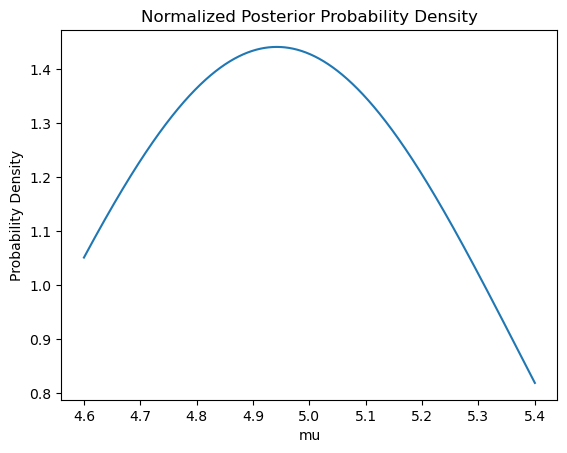

In [51]:
import math 
from matplotlib import pyplot as plt 
Prior=(1/(5.4-4.6))

def LnLikelihood(mu_variable):
    LogLikelihood=0
    for row in Data1:
        Volts=row[0] #data point is the first value 
        sigma=row[1] #Uncertainty is the second value 
        LogLikelihood=LogLikelihood+np.log(np.exp((-(Volts-mu_variable)**2)/(2*sigma*sigma))/(sigma*np.sqrt(2*np.pi)))
        #I applied the fact that the Log of a product is the sum of the logs of the terms that are multiplied. 
    return LogLikelihood #Multiply by neg 1 so the minimizer will maximize the log likelihood, rather than minimizing it 

def UnNormalizedPosterior(mu_variable):
    Normalization=1
    return Normalization*Prior*math.exp(LnLikelihood(mu_variable)) #Take exp of LnLikelihood so we get the likelihood back 

xgrid=np.linspace(4.6,5.4,100000) #I used lots of values here so the integral converges nicely
UnNormalizedPosteriorValues=[]
for element in xgrid: #Load unnormalized posterior probability density values into a list 
    UnNormalizedPosteriorValues.append(UnNormalizedPosterior(element))
PosteriorIntegral=np.sum(UnNormalizedPosteriorValues)*(xgrid[1]-xgrid[0]) #Integrate using Riemann Sum 

def NormalizedPosterior(mu_variable):
    Normalization=1/PosteriorIntegral #Normalizing the distribution to integrate to 1 
    return Normalization*Prior*math.exp(LnLikelihood(mu_variable))

NormalizedPoseteriorValues=[] 
for element in xgrid: #Loading values for normalized posterior probability density distribution into a list so I can plot it 
    NormalizedPoseteriorValues.append(NormalizedPosterior(element))

Fourp6_to_Fivep4=NormalizedPoseteriorValues #Store for later plotting 

#Plotting the normalized distribution 
plt.plot(xgrid, NormalizedPoseteriorValues)
plt.xlabel("mu")
plt.ylabel("Probability Density")
plt.title("Normalized Posterior Probability Density")
plt.show()




In [52]:
def NormalizedPosterior(mu_variable):
    LogLikelihood=0
    for row in Data1:
        Volts=row[0] #data point is the first value 
        sigma=row[1] #Uncertainty is the second value 
        LogLikelihood=LogLikelihood+np.log(np.exp((-(Volts-mu_variable)**2)/(2*sigma*sigma))/(sigma*np.sqrt(2*np.pi)))
        #I applied the fact that the Log of a product is the sum of the logs of the terms that are multiplied. 
    return math.exp(LogLikelihood)*Prior*(1/PosteriorIntegral)

def CDF(mu):
    numvals=int(np.ceil((mu-4.6)/(10**(-5))))
    xgrid=np.linspace(4.6,mu,numvals)
    NormalizedPosteriorValues=[]
    for element in xgrid:
        NormalizedPosteriorValues.append(NormalizedPosterior(element))
    return np.sum(NormalizedPosteriorValues)*(10**(-5)) #Integrate using Riemann Sum 

DesiredCDFValue=(1-0.683)/2 #Half of 1 - 0.683 so equal tails leave 68.3 probability around the mean 
CDFValue=0 #initializing values 
testedmu=4.73
while testedmu < 5.4: #brute force search, plugging values into the CDF. This is inefficient, though it runs fast enough for this, and it is easy to code
    CDFValue=CDF(testedmu) #upate cdf 
    if ((CDFValue-DesiredCDFValue)**2)/DesiredCDFValue>0.000001:
        testedmu=testedmu+0.001 #try a bigger value if we aren't getting what we want 
    else:
        fittedmu=testedmu
        testedmu = 8 #To make it stop if we have what we want 
print("For 68.3% within equal tails, we have mu between these two values : ")
print(fittedmu)
print(5.4-(fittedmu-4.6))

print("CDF at lower value: ")
print(CDF(fittedmu))


For 68.3% within equal tails, we have mu between these two values : 
4.735000000000002
5.264999999999998
CDF at lower value: 
0.15839231348268237


In [53]:
xgrid=np.linspace(4.6,5.4,100000)
Max=max(Fourp6_to_Fivep4) #Find maximum value of posterior 
print("MAP: ")
print(xgrid[Fourp6_to_Fivep4.index(Max)]) #Find the index of that max value, then use that to pull out the corresponding value of mu 

MAP: 
4.942115421154211


Question 1 Part 6

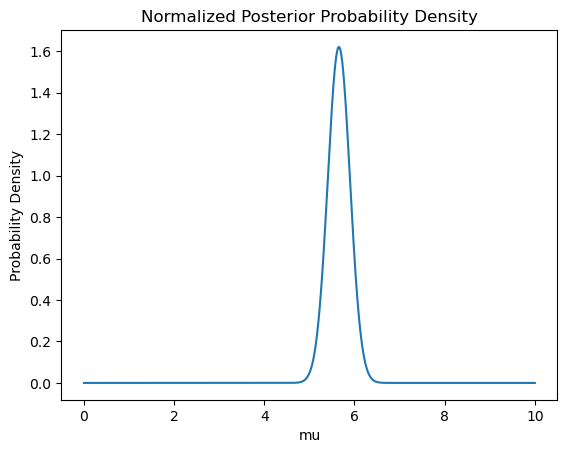

In [54]:
import math 
from matplotlib import pyplot as plt 

def Prior(x): #Gaussian Prior 
    return math.exp(-0.5*((x-6)**2)/(0.3**2))/(0.3*math.sqrt(2*math.pi))

def LnLikelihood(mu_variable):
    LogLikelihood=0
    for row in Data1:
        Volts=row[0] #data point is the first value 
        sigma=row[1] #Uncertainty is the second value 
        LogLikelihood=LogLikelihood+np.log(np.exp((-(Volts-mu_variable)**2)/(2*sigma*sigma))/(sigma*np.sqrt(2*np.pi)))
        #I applied the fact that the Log of a product is the sum of the logs of the terms that are multiplied. 
    return LogLikelihood #Multiply by neg 1 so the minimizer will maximize the log likelihood, rather than minimizing it 

def UnNormalizedPosterior(mu_variable):
    Normalization=1
    return Normalization*Prior(mu_variable)*math.exp(LnLikelihood(mu_variable)) #Take exp of LnLikelihood so we get the likelihood back 

xgrid=np.linspace(0,10,100000) #I used lots of values here so the integral converges nicely
UnNormalizedPosteriorValues=[]
for element in xgrid: #Load unnormalized posterior probability density values into a list 
    UnNormalizedPosteriorValues.append(UnNormalizedPosterior(element))
PosteriorIntegral=np.sum(UnNormalizedPosteriorValues)*(xgrid[1]-xgrid[0]) #Integrate using Riemann Sum 

def NormalizedPosterior(mu_variable):
    Normalization=1/PosteriorIntegral #Normalizing the distribution to integrate to 1 
    return Normalization*Prior(mu_variable)*math.exp(LnLikelihood(mu_variable))

NormalizedPoseteriorValues=[] 
for element in xgrid: #Loading values for normalized posterior probability density distribution into a list so I can plot it 
    NormalizedPoseteriorValues.append(NormalizedPosterior(element))

Gaussian=NormalizedPoseteriorValues #Store for later plotting 

#Plotting the normalized distribution 
plt.plot(xgrid, NormalizedPoseteriorValues)
plt.xlabel("mu")
plt.ylabel("Probability Density")
plt.title("Normalized Posterior Probability Density")
plt.show()




In [70]:
def Prior(x): #Gaussian Prior 
    return math.exp(-0.5*((x-6)**2)/(0.3**2))/(0.3*math.sqrt(2*math.pi))

def NormalizedPosterior(mu_variable):
    LogLikelihood=0
    for row in Data1:
        Volts=row[0] #data point is the first value 
        sigma=row[1] #Uncertainty is the second value 
        LogLikelihood=LogLikelihood+np.log(np.exp((-(Volts-mu_variable)**2)/(2*sigma*sigma))/(sigma*np.sqrt(2*np.pi)))
        #I applied the fact that the Log of a product is the sum of the logs of the terms that are multiplied. 
    return math.exp(LogLikelihood)*Prior(mu_variable)*(1/PosteriorIntegral)

def CDF(mu):
    numvals=int(np.ceil((mu-0)/(10**(-5))))
    xgrid=np.linspace(0,mu,numvals)
    NormalizedPosteriorValues=[]
    for element in xgrid:
        NormalizedPosteriorValues.append(NormalizedPosterior(element))
    return np.sum(NormalizedPosteriorValues)*(10**(-5)) #Integrate using Riemann Sum 

print("For 68.3% within equal tails, we have mu between these two values : ")
print(5.408)
print(5.9) #Found through trial and error (pulling values from the distribution)
print("Probability between these two values: ")
print(CDF(5.9)-CDF(5.408))


For 68.3% within equal tails, we have mu between these two values : 
5.408
5.9
Probability between these two values: 
0.6825238088187376


In [71]:
xgrid=np.linspace(0,10,100000)
Max=max(Gaussian) #Find maximum value of posterior 
print("MAP: ")
print(xgrid[Gaussian.index(Max)]) #Find the index of that max value, then use that to pull out the corresponding value of mu 

MAP: 
5.653956539565396


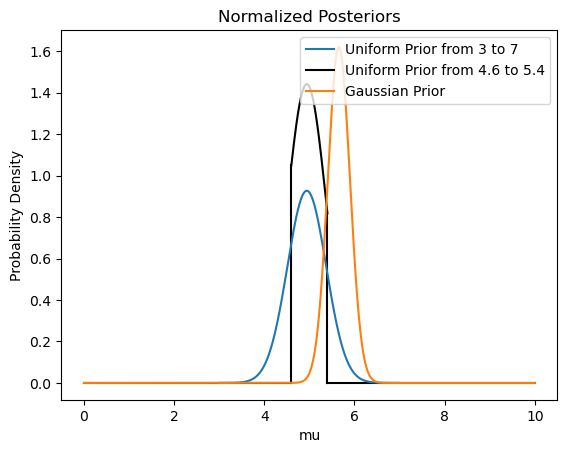

In [81]:

xgrid1=np.linspace(3,7,100000)
xgrid2=np.linspace(4.6,5.4,100000)
xgrid3=np.linspace(0,10,100000)
plt.plot([xgrid2[0],xgrid2[0]],[0,Fourp6_to_Fivep4[0]],color='k') #Adding vertical lines to show that this one posterior is zero outside 4.6 to 5.4 
plt.plot([xgrid2[-1],xgrid2[-1]],[0,Fourp6_to_Fivep4[-1]],color='k')
plt.plot([0,xgrid2[0]],[0,0], color='k')
plt.plot([xgrid2[-1],10],[0,0], color='k') #Horizontal lines with zero probability where this posterior is zero. 
#I haven't included these vertical and horizontal lines for the blue curve because you wouldn't be able to see them given the overlap of the lines. 
plt.plot(xgrid1, Three_to_Seven, label="Uniform Prior from 3 to 7")
plt.plot(xgrid2, Fourp6_to_Fivep4, color='k', label="Uniform Prior from 4.6 to 5.4")
plt.plot(xgrid3, Gaussian, label="Gaussian Prior")
plt.xlabel("mu")
plt.ylabel("Probability Density")
plt.title("Normalized Posteriors")
plt.legend(loc="upper right")

Question 1, final part

Note that the integral of a delta function times some function f(x) just gives the value of f(x) at the value of x where the delta function is non zero. 
We thus just have the likelihood evaluated at 5.106, which is the sample mean I found in part 1. (The question says to use the result from part 1. 
Was confused at first by it calling it the best fit value. At first I thought it meant the result from part 2 where we maximize the log likelihood.)

In case you did want me to use the best fit value from part 2 (4.94211819), I've done that too. 

In [86]:
import math 
from matplotlib import pyplot as plt 

def LnLikelihood(mu_variable):
    LogLikelihood=0
    for row in Data1:
        Volts=row[0] #data point is the first value 
        sigma=row[1] #Uncertainty is the second value 
        LogLikelihood=LogLikelihood+np.log(np.exp((-(Volts-mu_variable)**2)/(2*sigma*sigma))/(sigma*np.sqrt(2*np.pi)))
        #I applied the fact that the Log of a product is the sum of the logs of the terms that are multiplied. 
    return LogLikelihood 

print("Evidence, using delta function prior, mu from part 1: ")
print(math.exp(LnLikelihood(5.106)))

print("Bayes Factor, using result from part 1: ")
print(math.exp(LnLikelihood(5.106))/(2.8918714381486332e-08))

print("Evidence, using delta function prior, mu from part 2: ")
print(math.exp(LnLikelihood(4.94211819)))

print("Bayes Factor, using result from part 2: ")
print(math.exp(LnLikelihood(4.94211819))/(2.8918714381486332e-08))


Evidence, using delta function prior, mu from part 1: 
9.975417031611431e-08
Bayes Factor, using result from part 1: 
3.4494676699727913
Evidence, using delta function prior, mu from part 2: 
1.0725971348964424e-07
Bayes Factor, using result from part 2: 
3.7090069798646224


In part 3 we had evidence of 2.8918714381486332e-08. The evidence when using the delta function prior is thus 3.45 times greater. The delta function prior thus seems to be favored. 
There does thus seem to be a penalty for using a wider prior. A factor of 3.45 is a notable penalty, so I would say there is some Occam penalty involved, though it is not like it is three
orders of magnitude or something. 

When I re-did this using the result from part 2, I found a very similar outcome, except the Bayes factor is now about 3.709. 

## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in `Lecture 9`. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [178]:
#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in the lecture? 

### Solution

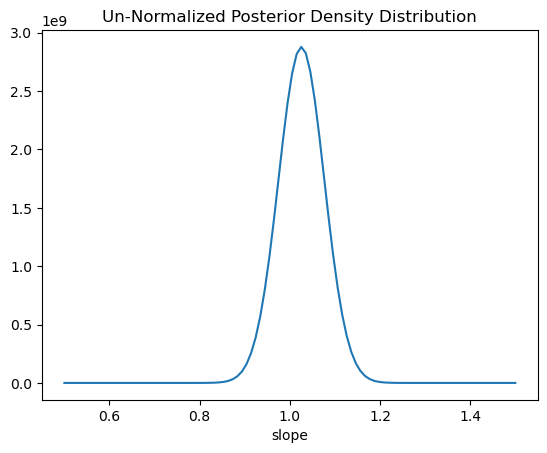

In [98]:
data=np.load('hw4_data_2.npy')
x, y, sigma_y = data

#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))


Prior = 1/(1.5-0.5) #uniform prior from 0.5 to 1.5
slopegrid = np.linspace(0.5,1.5,100) #values of slope 
PosteriorValues=[] #initializing this 
for element in slopegrid:
    PosteriorValues.append(Prior*math.exp(logL([-0.23, element], data, model=polynomial_fit))) #Fixing y intercept at -0.23 with theta0

plt.plot(slopegrid, PosteriorValues) #plotting 
plt.xlabel("slope")
plt.title("Un-Normalized Posterior Density Distribution")
plt.show()

In [100]:
Evidence=np.sum(PosteriorValues)*(slopegrid[1]-slopegrid[0])
print("Evidence: ")
print(Evidence)

Evidence: 
365684733.1606578


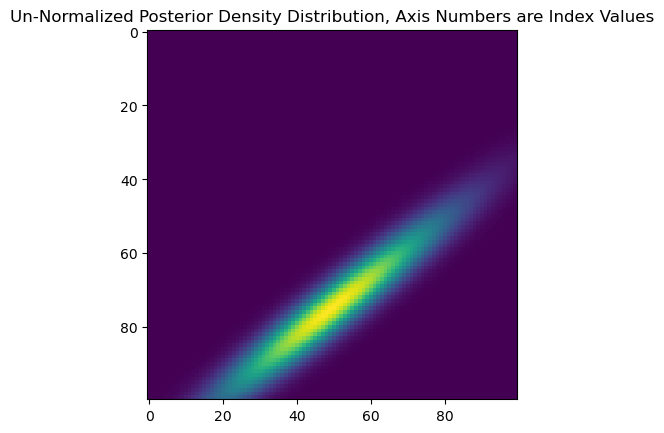

In [110]:
data=np.load('hw4_data_2.npy')
x, y, sigma_y = data

#Functions to do a polynomial fit, and compute the likelihood
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    # For a polynomial with order 1, this gives theta_0 + theta_1*x
    # For a polynomial with order 2, this gives theta_0 + theta_1*x + theta_2*x^2, etc.
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, data, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))


PriorLinear= 1/(1.5-0.5) #uniform prior from 0.5 to 1.5
PriorQuadratic = 1/(0.25+1) #uniform prior from -1 to 0.25

slopegrid = np.linspace(0.5,1.5,100) #values of slope 
quadraticgrid = np.linspace(-1,0.25,100) 
PosteriorValues=np.zeros((100,100), dtype=float) #initializing this 
for index1 in range(len(slopegrid)):
    for index2 in range(len(quadraticgrid)):
        PosteriorValues[index1, index2]=PriorLinear*PriorQuadratic*math.exp(logL([-0.23, slopegrid[index1], quadraticgrid[index2]], data, model=polynomial_fit)) #Fixing y intercept at -0.23 with theta0

plt.imshow(PosteriorValues) #plotting 
plt.title("Un-Normalized Posterior Density Distribution, Axis Numbers are Index Values")
plt.colorbar(img)
plt.show()

In [111]:
EvidenceQuadratic=np.sum(PosteriorValues)*(slopegrid[1]-slopegrid[0])*(quadraticgrid[1]-quadraticgrid[0]) #2D Riemann sum to do the integral 
print("Evidence: ")
print(EvidenceQuadratic)

Evidence: 
493061001.65705675


In [113]:
BayesFactor=Evidence/EvidenceQuadratic
print("Bayes Factor (linear/quadratic): ")
print(BayesFactor)

BayesFactor2=EvidenceQuadratic/Evidence 
print("Bayes Factor (quadratic/linear): ")
print(BayesFactor2)

Bayes Factor (linear/quadratic): 
0.7416622526050152
Bayes Factor (quadratic/linear): 
1.3483226313427696


This seems to agree with the content in the lecture and on the site linked in the lecture, in that the quadratic model is favored, but not enough
to merit adding a new parameter to the model. 